<h1><center>Assignment Day27</center></h1>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC

In [3]:
data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data = data.drop(['Name','PassengerId','Ticket','Cabin'],axis=1)

In [5]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
data.dropna(inplace=True)

In [7]:
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

In [8]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [9]:
x = data.drop(['Pclass'],axis=1)
y = data['Pclass']

In [10]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.25,random_state=42)

In [11]:
score = []
for i in range(1,268):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    score.append(accuracy_score(knn.predict(test_x),test_y, normalize=True))

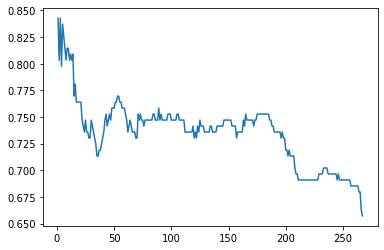

In [12]:
plt.plot(range(1,268),score)


From above figure we can give inference that if we keep k value as 1 then we can get highest accuracy

In [13]:
data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
data = data.drop(['Name','PassengerId','Ticket','Cabin'],axis=1)

In [17]:
le = LabelEncoder()

In [18]:
data.dropna(inplace=True)

In [19]:
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

In [20]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [22]:
def model(col):
    x = data.drop([col],axis=1)
    y = data[col]
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state=42)
    sv = SVC(gamma=0.01, C=100)
    sv.fit(train_x, train_y)
    print("=========================================================================")
    print(f"Accuracy score is {accuracy_score(sv.predict(test_x),test_y, normalize=True)}")
    print("=========================================================================")
    print(f"Confusion matrix: \n{confusion_matrix(sv.predict(test_x), test_y)}")
    print("=========================================================================")

### Pclass as Dependent variable

In [23]:
model('Pclass')

Accuracy score is 0.9269662921348315
Confusion matrix: 
[[50  4  1]
 [ 0 39  5]
 [ 0  3 76]]


### Survived as Dependent variable

In [24]:
model('Survived')

Accuracy score is 0.7247191011235955
Confusion matrix: 
[[73 23]
 [26 56]]


### Gender as Dependent variable

In [25]:
model('Sex')

Accuracy score is 0.6404494382022472
Confusion matrix: 
[[36 32]
 [32 78]]


### SibSp as Dependent Variable

In [26]:
model('SibSp')

Accuracy score is 0.8146067415730337
Confusion matrix: 
[[95 11  1  0  0  0]
 [13 40  3  0  0  0]
 [ 4  1  3  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  4  0]
 [ 0  0  0  0  0  1]]


### Parch as Dependent Variable

In [27]:
model('Parch')

Accuracy score is 0.7078651685393258
Confusion matrix: 
[[106  20   8   2   1   0]
 [ 10  12   3   0   1   0]
 [  1   2   8   1   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   1]
 [  0   2   0   0   0   0]]


### Embarked as Dependent Variable

In [29]:
model('Embarked')

Accuracy score is 0.7696629213483146
Confusion matrix: 
[[ 16   0  11]
 [  2   3   0]
 [ 21   7 118]]


<h1><center>Thankyou</center></h1>